In [11]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras import losses, optimizers
import matplotlib.pyplot as pyplot

In [2]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
red_wine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x = red_wine.iloc[:,:11]
y = red_wine.iloc[:,11:]

In [30]:
model = Sequential()
model.add(Dense(20, input_shape=(11,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

# good optimizers - adagrad, sgd, adadelta, RMSprop, 

sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0, nesterov=True)

model.compile(loss=losses.mean_squared_logarithmic_error , optimizer='rmsprop' , metrics=['accuracy'])

In [31]:
history = model.fit(x.values, y.values, epochs=180, verbose=0, validation_split=0.2, batch_size=16)

# evaluate the model
scores = model.evaluate(x.values, y.values)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

  32/1599 [..............................] - ETA: 0s
acc: 61.48%


We are getting 61.48% accuracy for the model. Looks like we need more data for higher accuracy. Best model in kaggle competition have been able to get 60% accuracy on this dataset (https://www.kaggle.com/c/wine-quality/leaderboard).

We will stop for now.

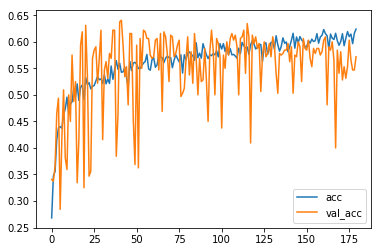

In [32]:
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.legend(['acc', 'val_acc'])
pyplot.show()